In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# **Read CSV**

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Credit card ds/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data Cleaning and Missing values**







In [8]:
#Check the shape of data
data.shape

# Data information
#data.info

# Describe the data
#data.describe()

#Check for the missing values
# isnull().sum() return the number of null values in a column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Handeling the missing data
# handle missing value in train_data
data["V13"] = data["V13"].fillna(data["V13"].mean())
data["V14"] = data["V14"].fillna(data["V14"].mean())
data["V15"] = data["V15"].fillna(data["V15"].mean())
data["V16"] = data["V16"].fillna(data["V16"].mean())
data["V17"] = data["V17"].fillna(data["V17"].mean())
data["V18"] = data["V18"].fillna(data["V18"].mean())
data["V19"] = data["V19"].fillna(data["V19"].mean())
data["V20"] = data["V20"].fillna(data["V20"].mean())
data["V21"] = data["V21"].fillna(data["V21"].mean())
data["V22"] = data["V22"].fillna(data["V22"].mean())
data["V23"] = data["V23"].fillna(data["V23"].mean())
data["V24"] = data["V24"].fillna(data["V24"].mean())
data["V25"] = data["V25"].fillna(data["V25"].mean())
data["V26"] = data["V26"].fillna(data["V26"].mean())
data["V27"] = data["V27"].fillna(data["V27"].mean())
data["V28"] = data["V28"].fillna(data["V28"].mean())
data["Amount"] = data["Amount"].fillna(data["Amount"].mean())
data['Class'] = data['Class'].fillna(0)

In [9]:
#Check weather V13 is filled 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Summary of Dataset Classes**

In [10]:

# summarize the class distribution
from collections import Counter
print(data.shape)
target = data.values[:,-1]
counter = Counter(target)
print(counter.items())
print(len(target))

for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%f, Count=%d, Percentage=%.3f%%' % (k, v, per))

(284807, 31)
dict_items([(0.0, 284315), (1.0, 492)])
284807
Class=0.000000, Count=284315, Percentage=99.827%
Class=1.000000, Count=492, Percentage=0.173%


# **Split Dataset**

Below create Train Test and Validation datasets

In [11]:
#Divide Dataset 

df = data
x = df.drop(['Class'], axis = 1)
y =  data['Class']

# Split dataset in train Test and Validation
from sklearn.model_selection import train_test_split

train_x, test_x1, train_y, test_y1 = train_test_split(x,y, test_size = 0.5 , random_state = 1, stratify=y)
train_x.shape , test_x1.shape, train_y.shape, test_y1.shape


((142403, 30), (142404, 30), (142403,), (142404,))

In [12]:
# Test and validation data
test_x, val_x, test_y, val_y = train_test_split(test_x1,test_y1, test_size = 0.4 , random_state = 1, stratify=test_y1)
train_x.shape , test_x.shape, val_x.shape, train_y.shape , test_y.shape, val_y.shape

((142403, 30), (85442, 30), (56962, 30), (142403,), (85442,), (56962,))

# **MODEL**

In [13]:
#Create a model

network =  models.Sequential()
network.add(tf.keras.layers.Dense(64 , activation = 'relu', input_shape = (30,)))
network.add(tf.keras.layers.Dense(32, activation = 'relu' ))
network.add(tf.keras.layers.Dense(1, activation = 'relu' ))
#network.add(tf.keras.layers.Dense(1, activation = 'sigmoid' ))

In [14]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.3)
network.compile(loss ='binary_crossentropy', optimizer =opt, metrics = 'accuracy')

# **Epochs**

In [15]:
history = network.fit(train_x, train_y, validation_data =  (val_x, val_y), epochs = 20 , batch_size = 200)

Epoch 1/20
713/713 [==============================] - 3s 3ms/step - loss: 0.0245 - accuracy: 0.9984 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 2/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9982 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 3/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9984 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 4/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9982 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 5/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0250 - accuracy: 0.9984 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 6/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9982 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 7/20
713/713 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.9982 - val_loss: 0.0266 - val_accuracy: 0.9983
Epoch 

## **Prediction**

In [16]:
y_pred = network.predict_classes(test_x)
#Convert 2D arry to 1D 
pred2 = y_pred.reshape(-1)
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred2})


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# **Evaluate Model**

In [17]:
# evaluate the model
_, train_acc = network.evaluate(train_x, train_y, verbose=0)
_, test_acc = network.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.998, Test: 0.998


# **Plot Graphs**

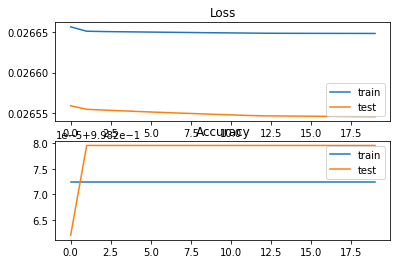

In [18]:
# plot loss during training
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()